In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from numba import jit

In [2]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y
args = ()
@jit(nopython=True)
def H_Chimera(u,t=0,args = args):
    r1 = u[0]
    r2 = u[1]
    phi = u[2]
    beta,alpha,eta1,eta2 = args
    dr1 = 1/2 * r1* (1-r1**2)*(eta1**2 * r1**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r1*r2*np.cos(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.cos(alpha + 2*phi))
    dr2 = 1/2 * r2* (1-r2**2)*(eta2**2 * r2**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r2*r1*np.cos(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.cos(alpha - 2*phi))
    dpsi1 = -1/2 * (1+r1**2)*(eta1**2 * r1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r1*r2*np.sin(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.sin(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r2**2)*(eta2**2 * r2**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r2*r1*np.sin(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.sin(alpha - 2*phi))
    dphi = dpsi1 - dpsi2
    return np.array([dr1,dr2,dphi])


@jit(nopython=True)
def myFun2(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

def myFun3(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

@jit(nopython=True)
def myFun4(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    r = np.abs(r)
    dr = 1/(2 * r)* (1-r**4)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/(2*r**2) * (1+r**4)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =   dpsi2 - dpsi1
    return np.array([dr,dphi])


def myFun5(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    r = np.abs(r)
    dr = 1/(2 * abs(r))* (1-abs(r)**4)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/(2*abs(r**2)) * (1+r**4)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

In [3]:
alpha = 1.5
beta = 0.6
eta1 = 0.1
eta2 = 0.0


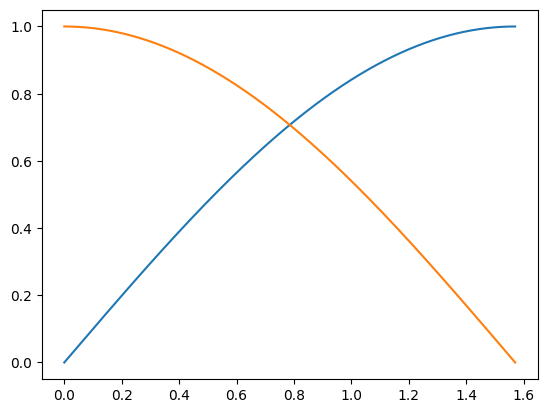

In [4]:
x =  np.linspace(0,np.pi/2, 1000)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

In [5]:
def r_00(beta,alpha):
    return np.sqrt((-np.sqrt(-beta**4+np.sin(alpha)**2) + np.sin(alpha)))/beta


def r_01(beta,alpha):
    return np.sqrt((-np.sqrt(-beta**4+np.sin(alpha)**2) - np.sin(alpha)))/beta



def phi_10(beta,alpha):
    return -alpha/2 + 1/2 * np.arcsin(np.sin(alpha)/beta**2 )


def phi_11(beta,alpha):
    return -alpha/2 - 1/2 * np.arcsin(np.sin(alpha)/beta**2 ) + np.pi/2
# def r_00(beta,alpha):
#     return np.sqrt(+np.sqrt(-beta**2+np.sin(alpha)**2) - np.sin(alpha))/beta

def r_0_l(alpha):
    return np.sqrt(np.sin(alpha))

In [6]:
beta_ = np.linspace(0,1,1000)
alpha_ = np.linspace(0,np.pi/2,1000)
AA,BB =  np.meshgrid(alpha_,beta_)
RR = r_00(BB,AA)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_50440/353723537.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((-np.sqrt(-beta**4+np.sin(alpha)**2) + np.sin(alpha)))/beta
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_50440/353723537.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sqrt((-np.sqrt(-beta**4+np.sin(alpha)**2) + np.sin(alpha)))/beta


In [7]:
np.nanmax(RR)

1.0

/Users/kimgug-young/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


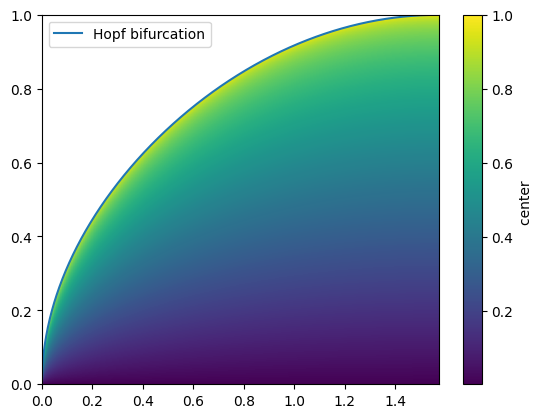

In [8]:
# plt.pcolormesh(AA,BB,RR,vmax=1)
plt.pcolormesh(AA,BB,RR,vmax=np.sqrt(1))
plt.plot(alpha_,r_0_l(alpha_),label='Hopf bifurcation')
plt.legend()
plt.colorbar(label='center ')

In [6]:
import sympy as sp
mu, alpha = sp.symbols('mu alpha',real=True,positive=True)
r = sp.symbols('r_sigma',real=True,positive=True)
eta1 = sp.symbols('\eta_sigma',real=True,positive=True)
eta2 = sp.symbols('\eta_{\sigma\'}',real=True,positive=True)
phi = sp.symbols('phi',real=True)

In [7]:
dphi =  -(eta1 ** 2 * sp.sin(alpha) + 2*mu*eta1*eta2*sp.sin(alpha+phi) + mu**2 * eta2**2 * sp.sin(alpha + 2*phi)) + \
         (eta2 ** 2 * sp.sin(alpha) + 2*mu*eta1*eta2*sp.sin(alpha-phi) + mu**2 * eta1**2 * sp.sin(alpha - 2*phi))
dphi.simplify()

\eta_sigma**2*mu**2*sin(alpha - 2*phi) - \eta_sigma**2*sin(alpha) + 2*\eta_sigma*\eta_{\sigma'}*mu*sin(alpha - phi) - 2*\eta_sigma*\eta_{\sigma'}*mu*sin(alpha + phi) - \eta_{\sigma'}**2*mu**2*sin(alpha + 2*phi) + \eta_{\sigma'}**2*sin(alpha)

In [9]:
(sp.sin(alpha+phi) - sp.sin(alpha-phi)).simplify()

2*sin(phi)*cos(alpha)

In [47]:
A = dphi.subs(eta1,2*eta2).trigsimp()

In [50]:
MUSOL = sp.solve(dphi,mu)

In [51]:
MUSOL[0]

(2*\eta_sigma*\eta_{\sigma'}*sin(phi)*cos(alpha) - sqrt(\eta_sigma**4*sin(alpha)**2 - 2*\eta_sigma**4*sin(alpha)*sin(phi)*cos(alpha - phi) - 2*\eta_sigma**2*\eta_{\sigma'}**2*sin(alpha)**2 + 4*\eta_sigma**2*\eta_{\sigma'}**2*sin(phi)**2 + \eta_{\sigma'}**4*sin(alpha)**2 + 2*\eta_{\sigma'}**4*sin(alpha)*sin(phi)*cos(alpha + phi)))/(\eta_sigma**2*sin(alpha - 2*phi) - \eta_{\sigma'}**2*sin(alpha + 2*phi))

In [11]:
COS =  (eta1 ** 2 *r**2 * sp.cos(alpha) + 2*mu*eta1*eta2*r*sp.cos(alpha+phi) + mu**2 * eta2**2 * sp.cos(alpha + 2*phi))

sp.solve(COS,alpha)

KeyboardInterrupt: 

In [303]:
rss =  sp.sin(alpha) / mu**2 + sp.sqrt((sp.sin(alpha)/mu**2)**2 -1)

In [297]:
eq = mu**2 * sp.sin(2*phi + alpha) - sp.sin(alpha)
dr = sp.Rational(1,2) / r *(1-r**4) * (mu**2 * sp.cos(2*phi + alpha))
dphi = -sp.Rational(1,2) / r**2 *(1+r**4) * (mu**2*eta2**2 * sp.sin(2*phi + alpha)) + (eta1**2 * sp.sin(alpha))
JRR = dr.diff(r)
JRphi = dr.diff(phi)
JphiR = dphi.diff(r)
Jphiphi = dphi.diff(phi)
J = sp.Matrix([[JRR,JphiR],[JphiR,Jphiphi]])
J
J.det()

(-2*\eta_{\sigma'}**4*mu**4*r_sigma**8*sin(alpha + 2*phi)**2 + 4*\eta_{\sigma'}**4*mu**4*r_sigma**4*sin(alpha + 2*phi)**2 - 2*\eta_{\sigma'}**4*mu**4*sin(alpha + 2*phi)**2 + 3*\eta_{\sigma'}**2*mu**4*r_sigma**10*cos(alpha + 2*phi)**2 + 4*\eta_{\sigma'}**2*mu**4*r_sigma**6*cos(alpha + 2*phi)**2 + \eta_{\sigma'}**2*mu**4*r_sigma**2*cos(alpha + 2*phi)**2)/(2*r_sigma**6)

In [298]:
def get_jacobian(mu, alpha, eta1, eta2, r, phi):
    eq = mu**2 * sp.sin(2*phi + alpha) - sp.sin(alpha)
    
    # r과 phi에 대한 미분 방정식
    dr = sp.Rational(1,2) / r *(1-r**4) * (mu**2 * sp.cos(2*phi + alpha))
    dphi = -sp.Rational(1,2) / r**2 *(1+r**4) * (mu**2*eta2**2 * sp.sin(2*phi + alpha)) + (eta1**2 * sp.sin(alpha))
    
    # 자코비안 행렬의 각 요소 계산
    JRR = dr.diff(r)
    JRphi = dr.diff(phi)
    JphiR = dphi.diff(r)
    Jphiphi = dphi.diff(phi)
    
    # 자코비안 행렬 구성
    J = sp.Matrix([[JRR,JphiR],[JphiR,Jphiphi]])
    
    return J, J.det()

In [304]:
sp.print_latex(J)

\left[\begin{matrix}- 2 \mu^{2} r_{\sigma}^{2} \cos{\left(\alpha + 2 \phi \right)} - \frac{\mu^{2} \left(1 - r_{\sigma}^{4}\right) \cos{\left(\alpha + 2 \phi \right)}}{2 r_{\sigma}^{2}} & - 2 \eta_{\sigma'}^{2} \mu^{2} r_{\sigma} \sin{\left(\alpha + 2 \phi \right)} + \frac{\eta_{\sigma'}^{2} \mu^{2} \left(r_{\sigma}^{4} + 1\right) \sin{\left(\alpha + 2 \phi \right)}}{r_{\sigma}^{3}}\\- 2 \eta_{\sigma'}^{2} \mu^{2} r_{\sigma} \sin{\left(\alpha + 2 \phi \right)} + \frac{\eta_{\sigma'}^{2} \mu^{2} \left(r_{\sigma}^{4} + 1\right) \sin{\left(\alpha + 2 \phi \right)}}{r_{\sigma}^{3}} & - \frac{\eta_{\sigma'}^{2} \mu^{2} \left(r_{\sigma}^{4} + 1\right) \cos{\left(\alpha + 2 \phi \right)}}{r_{\sigma}^{2}}\end{matrix}\right]


In [ ]:
alpha = np.pi/8
beta = 0.9
eta1 = 0.1
eta2 = 0.0


0.04968396959634526 0.9999999999996112


/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_54920/239284235.py:69: RuntimeWarning: divide by zero encountered in divide
  dr = 1/(2 * abs(r))* (1-abs(r)**4)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_54920/239284235.py:70: RuntimeWarning: divide by zero encountered in divide
  dpsi2 = -1/(2*abs(r)) * (1+r**4)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_54920/2095931485.py:40: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])


<Figure size 6400x4800 with 0 Axes>

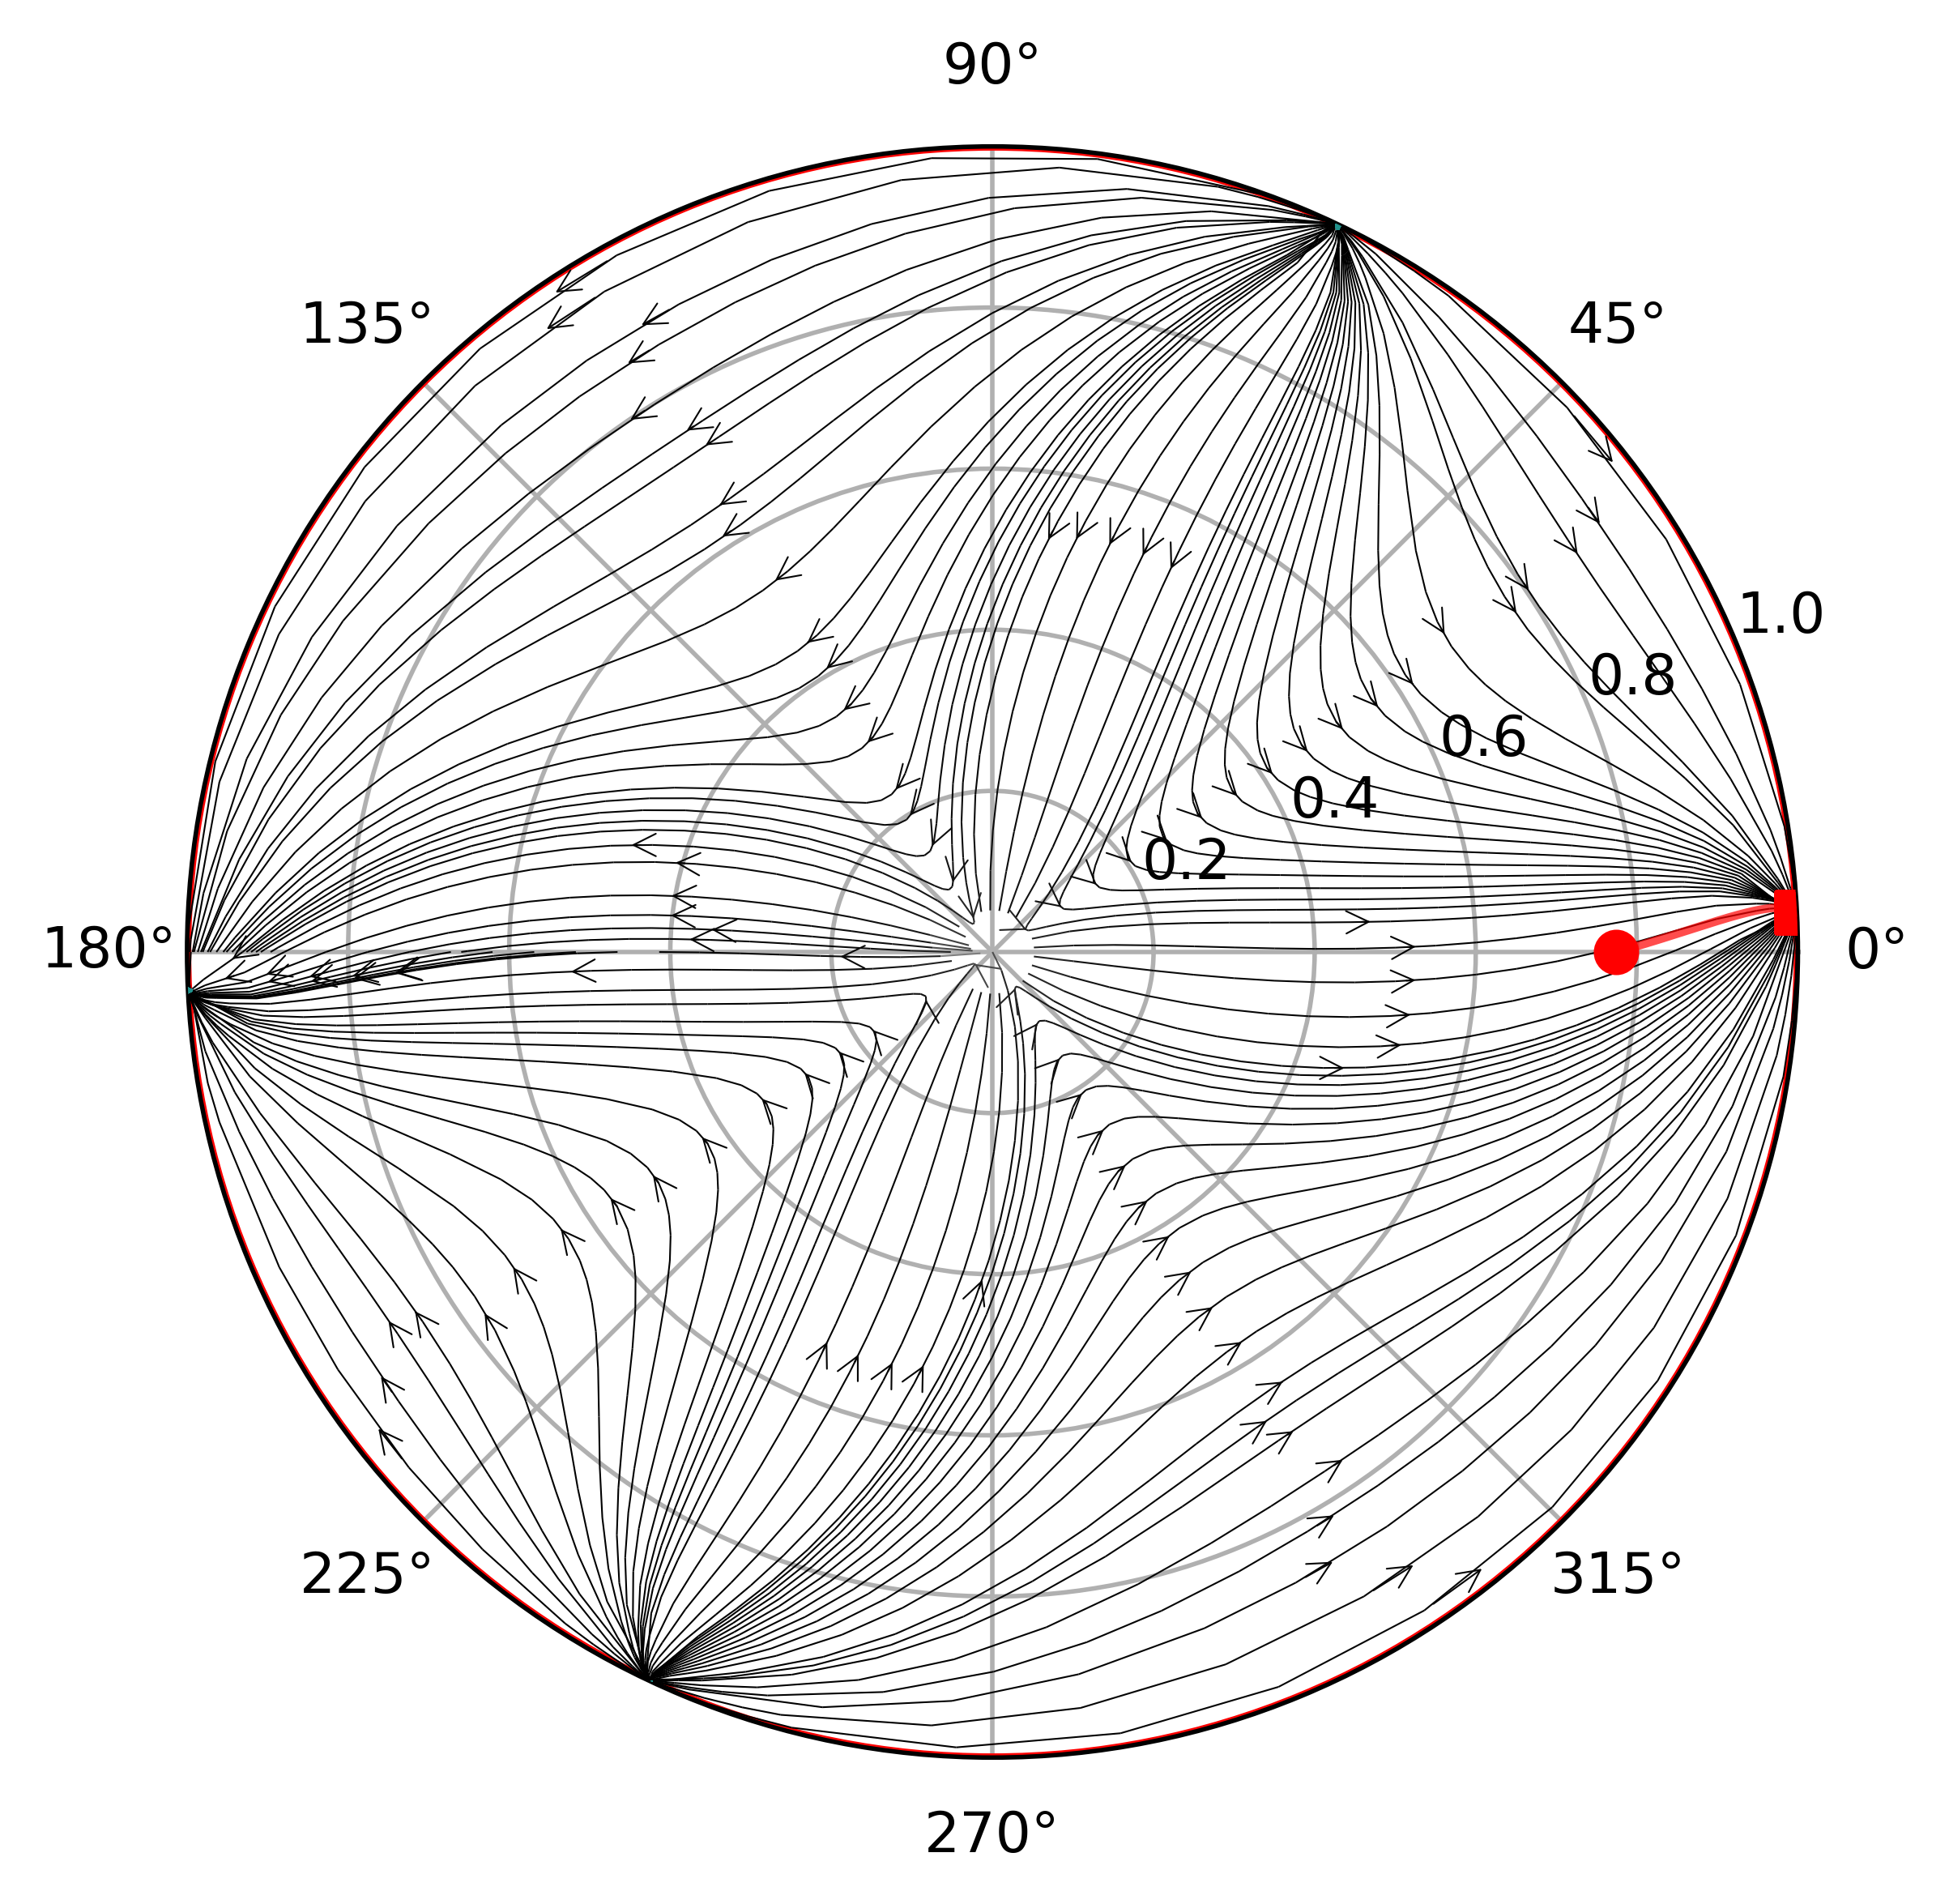

In [ ]:

args = beta,alpha,eta1,eta2
t = np.arange(0,8000,0.01)
plt.figure(dpi=1000)


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},dpi=500)
plt.sca(ax)

u0s = [[np.sqrt(0.6),0]]
for i,u0 in enumerate(u0s):

	u = RK4(myFun4,np.array(u0,dtype=float),t,args=(args,))
	if i == 3:
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),zorder=5)
	else:	
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),color='red',zorder=5)
	plt.scatter(u[-1,1]%(np.pi*2),u[-1,0],s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot(u[:,1],u[:,0],alpha=0.7,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	print(u[-1,1]%(np.pi*2),u[-1,0])

xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
# plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')

x = np.linspace(0,1.5,200)
y = np.linspace(-np.pi,np.pi,400)
X,Y = np.meshgrid(x,y)

U,V = myFun5([X,Y],0,args)
M = (np.hypot(U,V))

xs = np.linspace(-3,-1e-5,1000)

plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
ax = plt.gca()
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.3,broken_streamlines=False,)
ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])
ax.axhline(1,color='RED')
# plt.scatter(*np.array(PHI_R).T,zorder=5,color='blue',marker='s',label='Fixed point');
# plt.legend(loc=3)

plt.tight_layout()
plt.show()

In [268]:
R = sp.Rational(1,2) / r


1/2

In [180]:
sol[1]

-alpha/2 - asin(sin(alpha)/mu**2)/2 + pi/2

In [148]:
rss.trigsimp()

(sqrt(-mu**4 + sin(alpha)**2) + sin(alpha))/mu**2

In [257]:
alpha = 1.2
beta = 0.8
eta1 = 0.1
eta2 = 0.0

phiA = phi_10(beta,alpha)
phiB = phi_11(beta,alpha)


A = (np.pi/2 -  alpha)/2
B = (-3*np.pi/2 -  alpha)/2

RA = r_00(beta,alpha)
RB = r_00(beta,alpha)


C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\353723537.py:11: RuntimeWarning: invalid value encountered in arcsin
  return -alpha/2 + 1/2 * np.arcsin(np.sin(alpha)/beta**2 )
C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\353723537.py:15: RuntimeWarning: invalid value encountered in arcsin
  return -alpha/2 - 1/2 * np.arcsin(np.sin(alpha)/beta**2 ) + np.pi/2


In [261]:
np.max(u[:,0]**2)

np.float64(0.6538308557217275)

0.2817294829859725 0.7995462550285665


C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\3767567792.py:69: RuntimeWarning: divide by zero encountered in divide
  dr = 1/(2 * abs(r))* (1-abs(r)**4)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\3767567792.py:70: RuntimeWarning: divide by zero encountered in divide
  dpsi2 = -1/(2*abs(r**2)) * (1+r**4)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))


<Figure size 6400x4800 with 0 Axes>

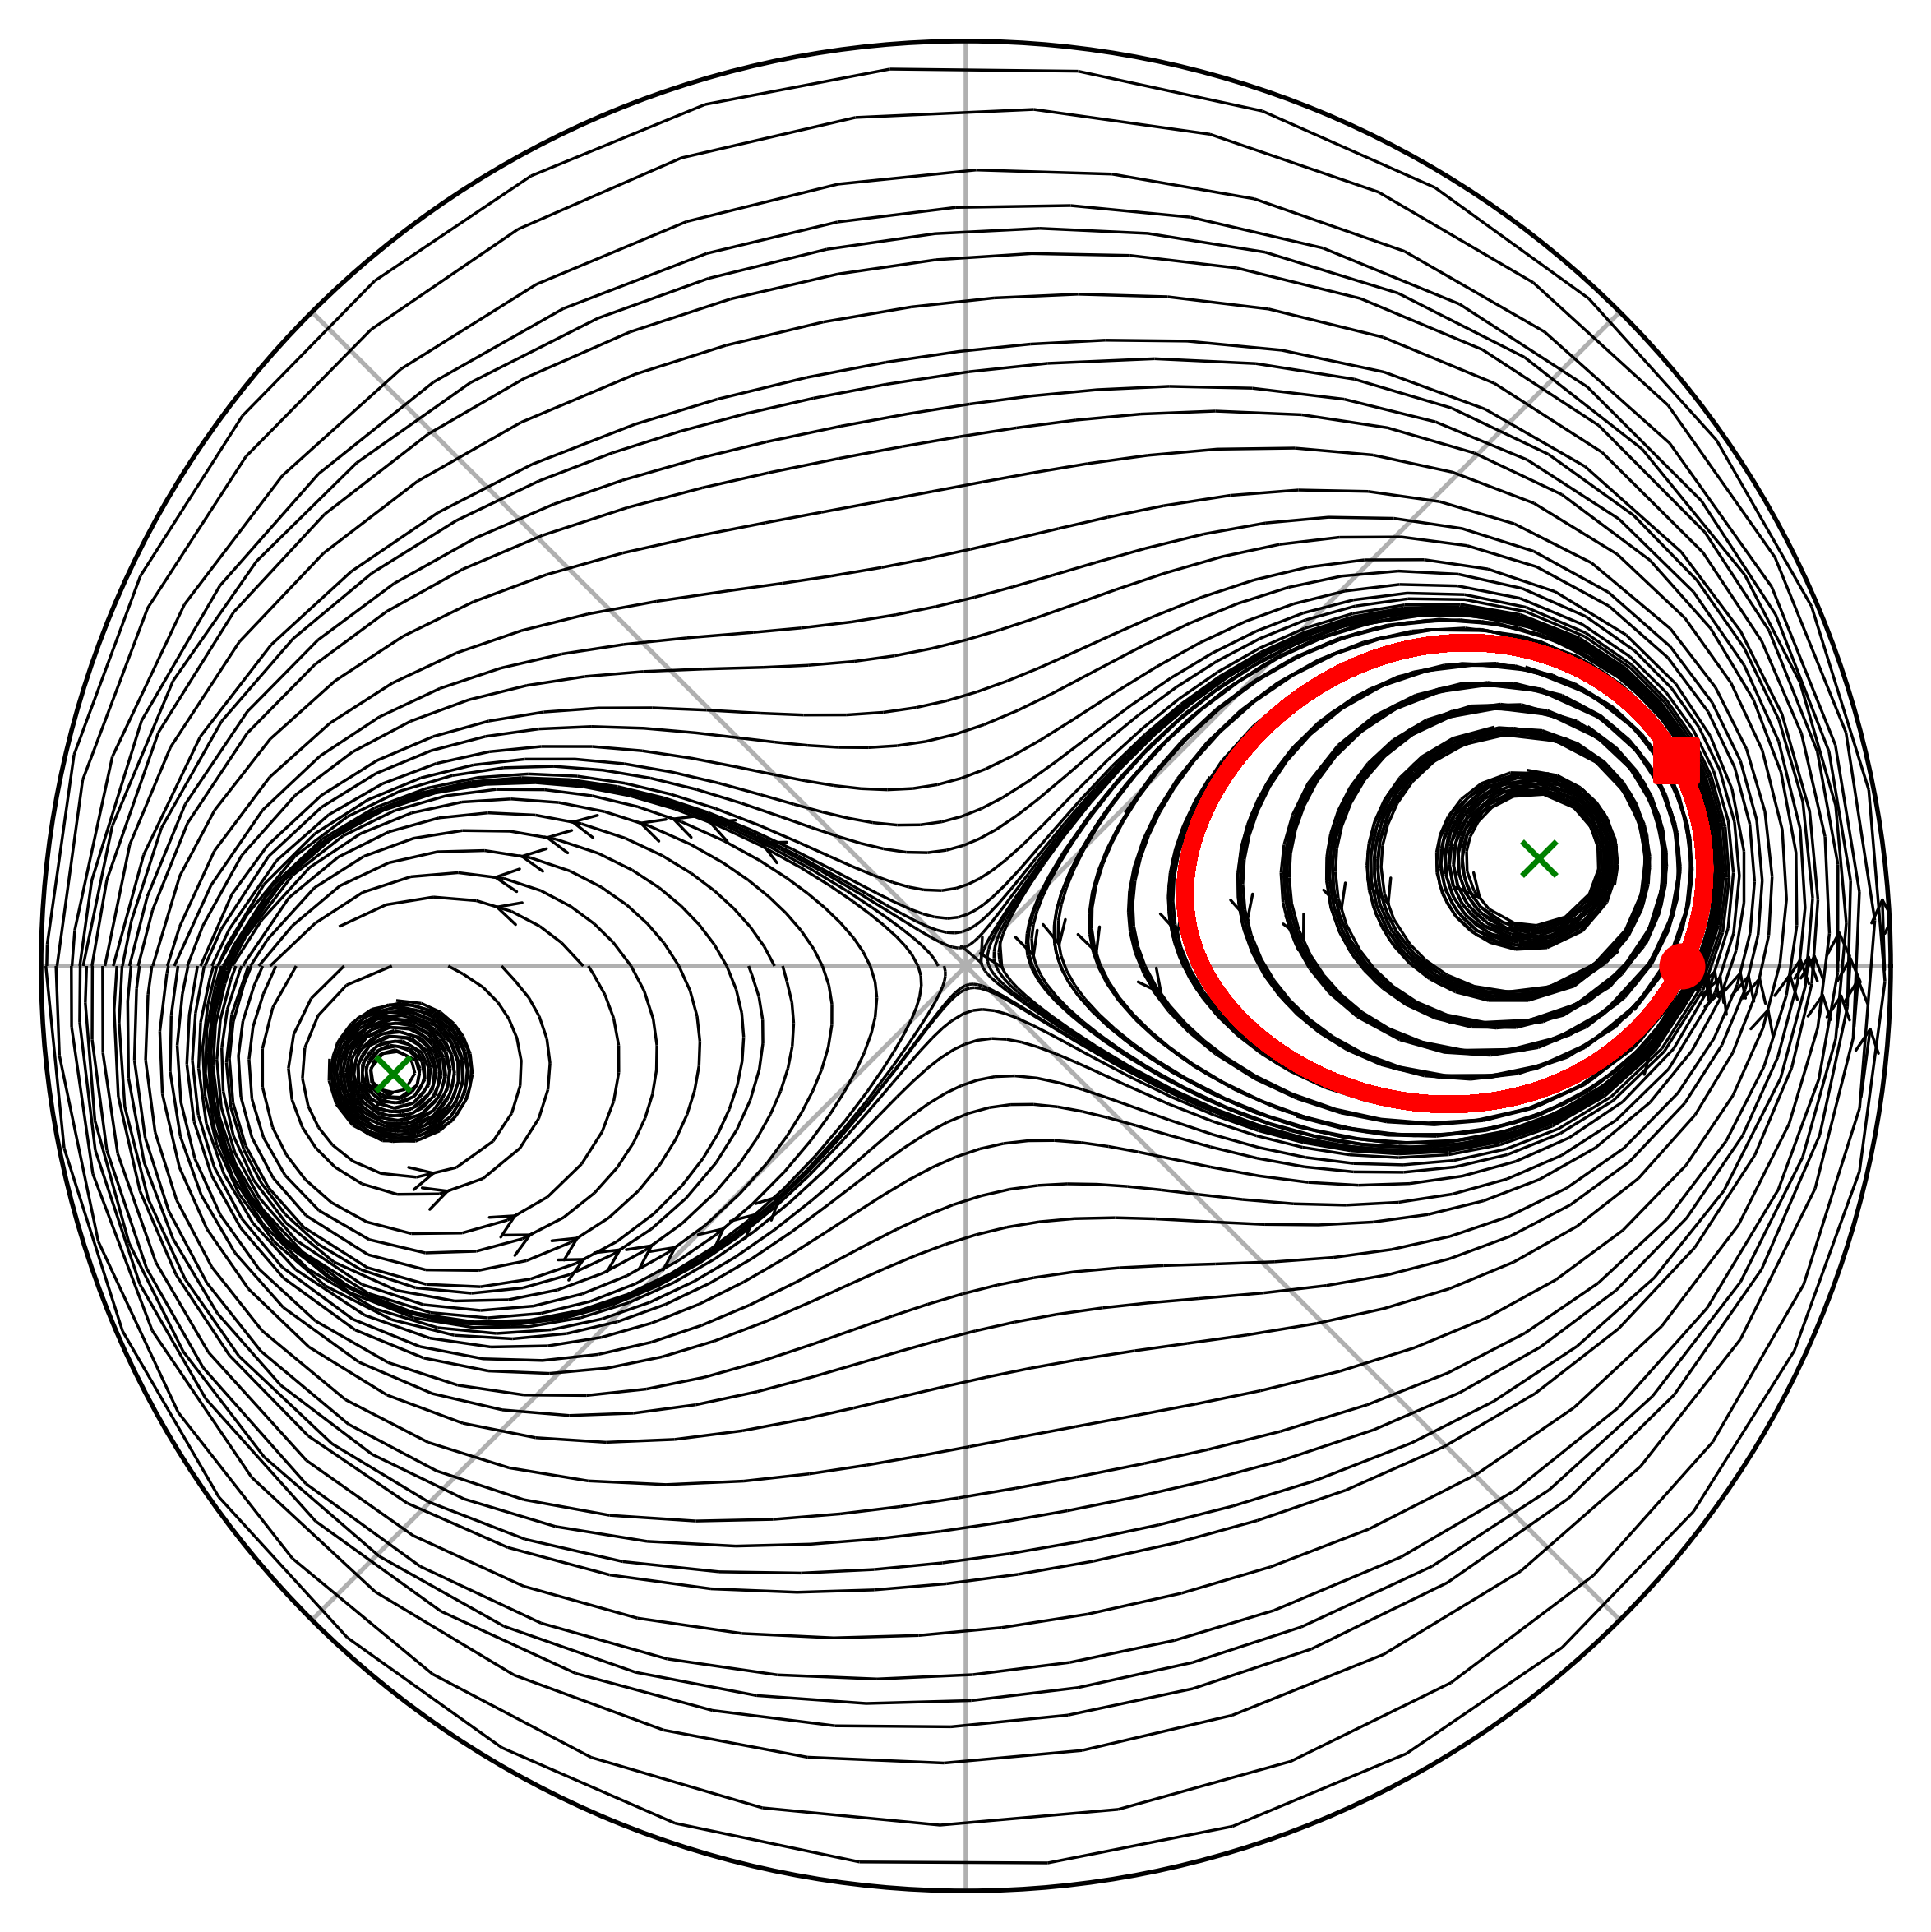

In [258]:

args = beta,alpha,eta1,eta2
t = np.arange(0,8000,0.01)
plt.figure(dpi=1000)


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},dpi=500)
plt.sca(ax)

u0s = [[np.sqrt(0.6),0]]
for i,u0 in enumerate(u0s):

	u = RK4(myFun4,np.array(u0,dtype=float),t,args=(args,))
	if i == 3:
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),zorder=5)
	else:	
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),color='red',zorder=5)
	plt.scatter(u[-1,1]%(np.pi*2),u[-1,0],s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot(u[:,1],u[:,0],lw=3,alpha=1,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	print(u[-1,1]%(np.pi*2),u[-1,0])

xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
# plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')

x = np.linspace(0,1.5,400)
y = np.linspace(-np.pi,np.pi,800)
X,Y = np.meshgrid(x,y)

U,V = myFun5([X,Y],0,args)
M = (np.hypot(U,V))

xs = np.linspace(-3,-1e-5,1000)

plt.scatter(phiA,1,zorder=6,color='green',marker='x')
plt.scatter(phiB,1,zorder=6,color='blue',marker='x')
plt.scatter(phiA+np.pi,1,zorder=6,color='green',marker='x')
plt.scatter(phiB+np.pi,1,zorder=6,color='blue',marker='x')

plt.plot(A,RA,zorder=5,color='green',fillstyle='none',marker='x')
plt.plot(B,RB,zorder=5,color='green',fillstyle='none',marker='x')

plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
plt.yticks([])
plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi,5*np.pi/4,6*np.pi/4,7*np.pi/4],['','','','','','','',''])


ax = plt.gca()
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.5,broken_streamlines=False,)
# ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])
# ax.axhline(1,color='RED')
# plt.scatter(*np.array(PHI_R).T,zorder=5,color='blue',marker='s',label='Fixed point');
# plt.legend(loc=3)

plt.tight_layout()
plt.show()

In [329]:
alpha = 0.2
beta = 0.2
eta1 = 0.1
eta2 = 0.0

phiA = 2*phi_10(beta,alpha)
phiB = 2*phi_11(beta,alpha)


A = (np.pi/2 -  alpha)
B = (-3*np.pi/2 -  alpha)

RA = r_00(beta,alpha)**2
RB = r_00(beta,alpha)**2


C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\353723537.py:11: RuntimeWarning: invalid value encountered in arcsin
  return -alpha/2 + 1/2 * np.arcsin(np.sin(alpha)/beta**2 )
C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\353723537.py:15: RuntimeWarning: invalid value encountered in arcsin
  return -alpha/2 - 1/2 * np.arcsin(np.sin(alpha)/beta**2 ) + np.pi/2


C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\3767567792.py:69: RuntimeWarning: divide by zero encountered in divide
  dr = 1/(2 * abs(r))* (1-abs(r)**4)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\3767567792.py:70: RuntimeWarning: divide by zero encountered in divide
  dpsi2 = -1/(2*abs(r**2)) * (1+r**4)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))


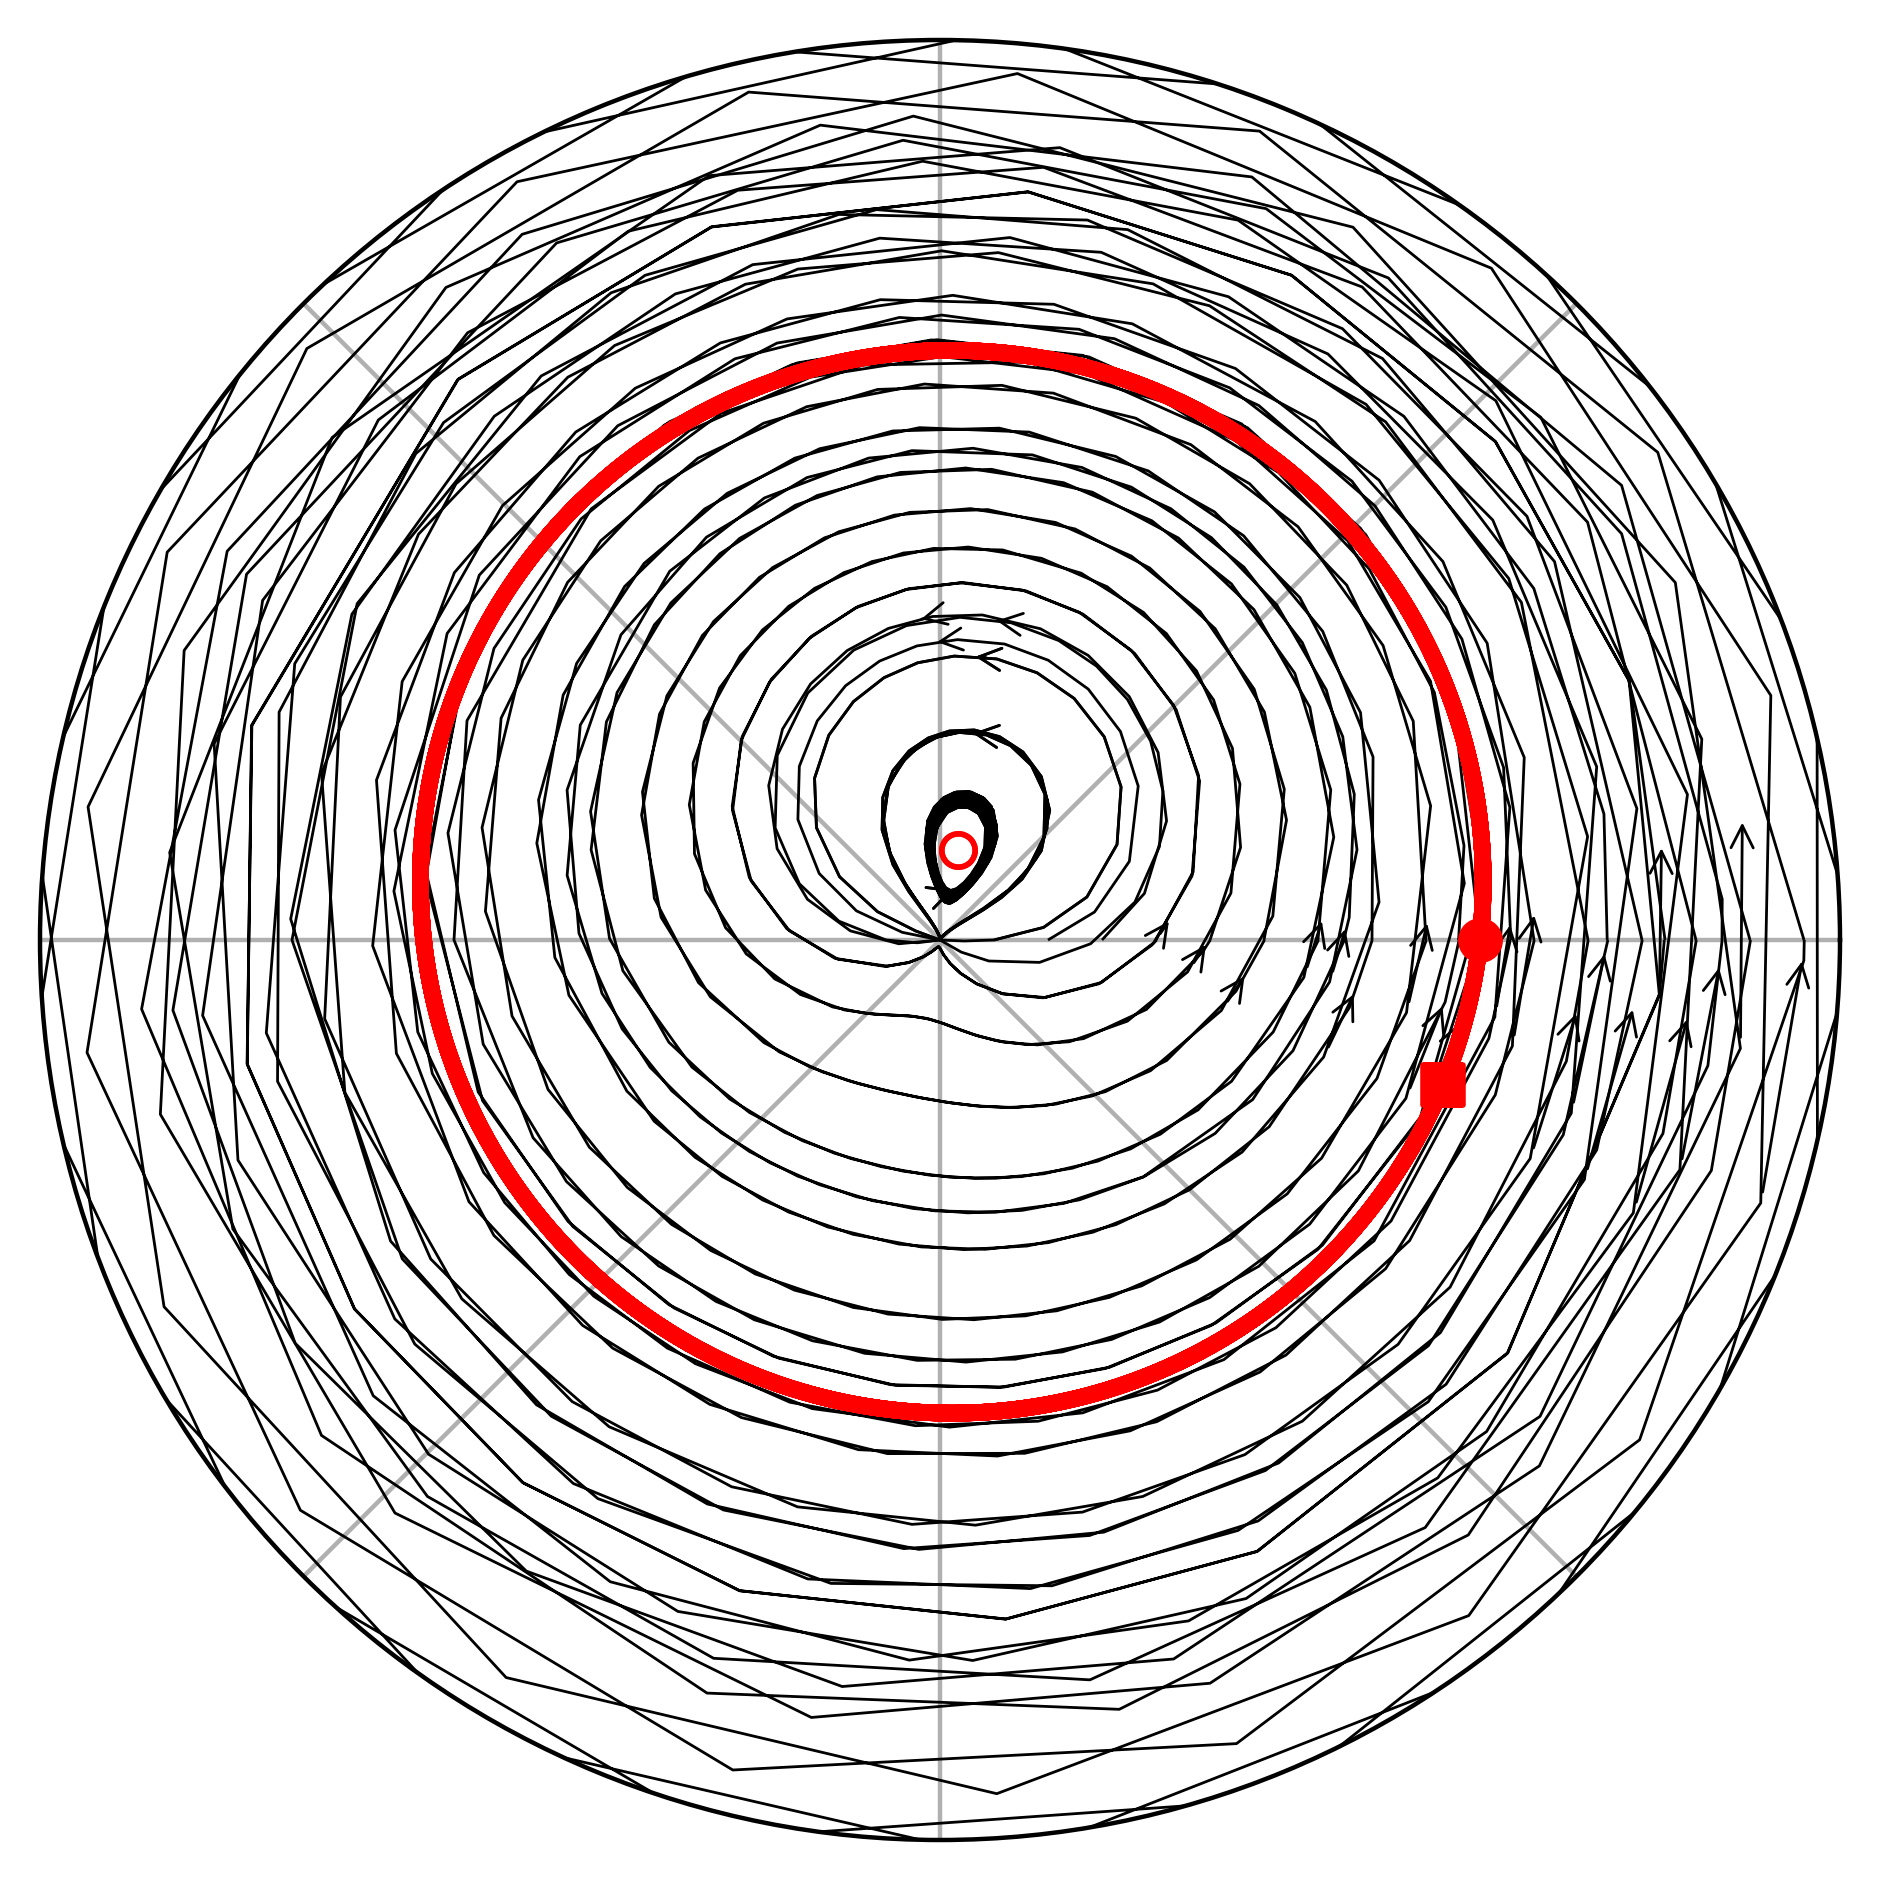

: 

In [330]:
args = beta,alpha,eta1,eta2
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},dpi=400)

u0s = [[np.sqrt(0.6),0]]
for i,u0 in enumerate(u0s):
	u = RK4(myFun4,np.array(u0,dtype=float),t,args=(args,))
	c=plt.scatter((2*u[0,1]),u[0,0]**2,s=50,zorder=5,color='red')
	plt.scatter((2*u[-1,1]),u[-1,0]**2,s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot((2*u[:,1])%(np.pi*2),u[:,0]**2,alpha=1,lw=3,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
x = np.linspace(0,1.2,6000)
x = np.sqrt(x)

y = np.linspace(-np.pi,np.pi,4000)

X,Y = np.meshgrid(x,y)

U,V = myFun5([X,Y],0,args)
M = (np.hypot(U,V))

# plt.sca(ax)
ax = plt.gca()
plt.ylim(0,1.0)
plt.yticks([])
plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi,5*np.pi/4,6*np.pi/4,7*np.pi/4],['','','','','','','',''])



plt.scatter(phiA,1,zorder=6,color='green',marker='x')
plt.scatter(phiB,1,zorder=6,color='blue',marker='x')
plt.scatter(phiA+2*np.pi,1,zorder=6,color='green',marker='x')
plt.scatter(phiB+2*np.pi,1,zorder=6,color='blue',marker='x')

plt.plot(A,RA,zorder=5,color='red',fillstyle='none',marker='o')
plt.plot(B,RB,zorder=5,color='red',fillstyle='none',marker='o')


plt.xlim(0,2*np.pi)
ax.streamplot((2*Y).T,(X.T)**2,V.T,U.T,zorder=3,density=0.7,arrowstyle='->',color='k',linewidth=0.5,broken_streamlines=False,)
# plt.title(rf'$\alpha={alpha},\beta={beta}$')
# plt.title(rf'$\alpha={alpha}$',fontsize=20)
# plt.title(rf'$\beta={beta}$',fontsize=20)
plt.tight_layout()
plt.show()
# ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=4,density=1,arrowstyle='-|>',cmap='bwr_r',linewidth=0.8,broken_streamlines=True, start_points=PHI_R)
# plt.scatter(*np.array(PHI_R).T,zorder=5,color='red');

In [256]:
A = (np.pi/2 -  alpha)/2
B = (-3*np.pi/2 -  alpha)/2

RA = r_00(beta,alpha)
RB = r_00(beta,alpha)
phiA = phi_10(beta,alpha)
phiB = phi_11(beta,alpha)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\353723537.py:11: RuntimeWarning: invalid value encountered in arcsin
  return -alpha/2 + 1/2 * np.arcsin(np.sin(alpha)/beta**2 )
C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\353723537.py:15: RuntimeWarning: invalid value encountered in arcsin
  return -alpha/2 - 1/2 * np.arcsin(np.sin(alpha)/beta**2 ) + np.pi/2


In [238]:
phiA

np.float64(nan)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\3436372589.py:1: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=40)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_19364\3436372589.py:2: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[-1e-5,0,5e-5])


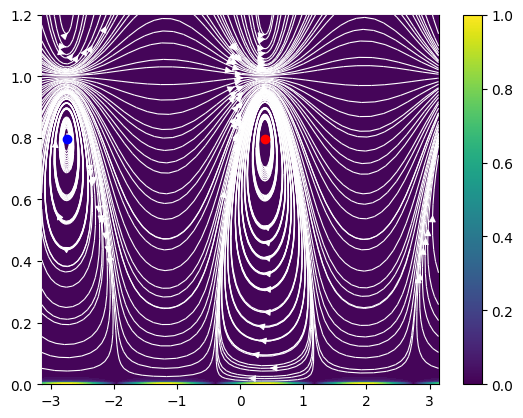

In [239]:
plt.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=40)
plt.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[-1e-5,0,5e-5])
plt.ylim(0,1.2)
plt.xlim(-np.pi,np.pi)
ax = plt.gca()
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='-|>',cmap = 'gray_r',linewidth=0.8,broken_streamlines=False,)
# plt.scatter(*np.array(PHI_R).T,zorder=5,color='red');
plt.scatter(A,RA,zorder=5,color='red')
plt.scatter(B,RB,zorder=5,color='blue')
plt.scatter(phiA,1,zorder=5,color='green')
plt.scatter(phiB,1,zorder=5,color='green')

plt.scatter(phiA-np.pi,1,zorder=5,color='green')
plt.scatter(phiB-np.pi,1,zorder=5,color='green')
plt.colorbar()

# OA ansatz and simulation comarelation

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from Simul import get_m1_m2,get_RQ_MOA,get_R_simul,get_RQ_MOA2,get_R_simul_wf,get_R_simul_wf2,RK4_ZZ2,Kuramoto_MF_CHIMERA,gen_dist2
from Simul import dZ2_dt,RK4,to_complex,dZ_dt,get_R_simul_wfT,RK4_ZZ
from parfor import parfor

from tqdm.notebook import tqdm
from parfor import parfor

In [29]:
alpha = 0.2
beta = 0.8
eta1 = 0.1
eta2 = 0.0
shift = 0
N = 5000

In [30]:
t_end = 20000
Q_init = 0.6
# R1,R2,Q1,Q2,t = get_RQ_MOA(1,0.6,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)
R1_2,R2_2,Q1_2,Q2_2,_ = get_RQ_MOA2(1,Q_init,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)
R1_s,R2_s,Q1_s,Q2_s,t = get_R_simul_wf(1.,Q_init,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)

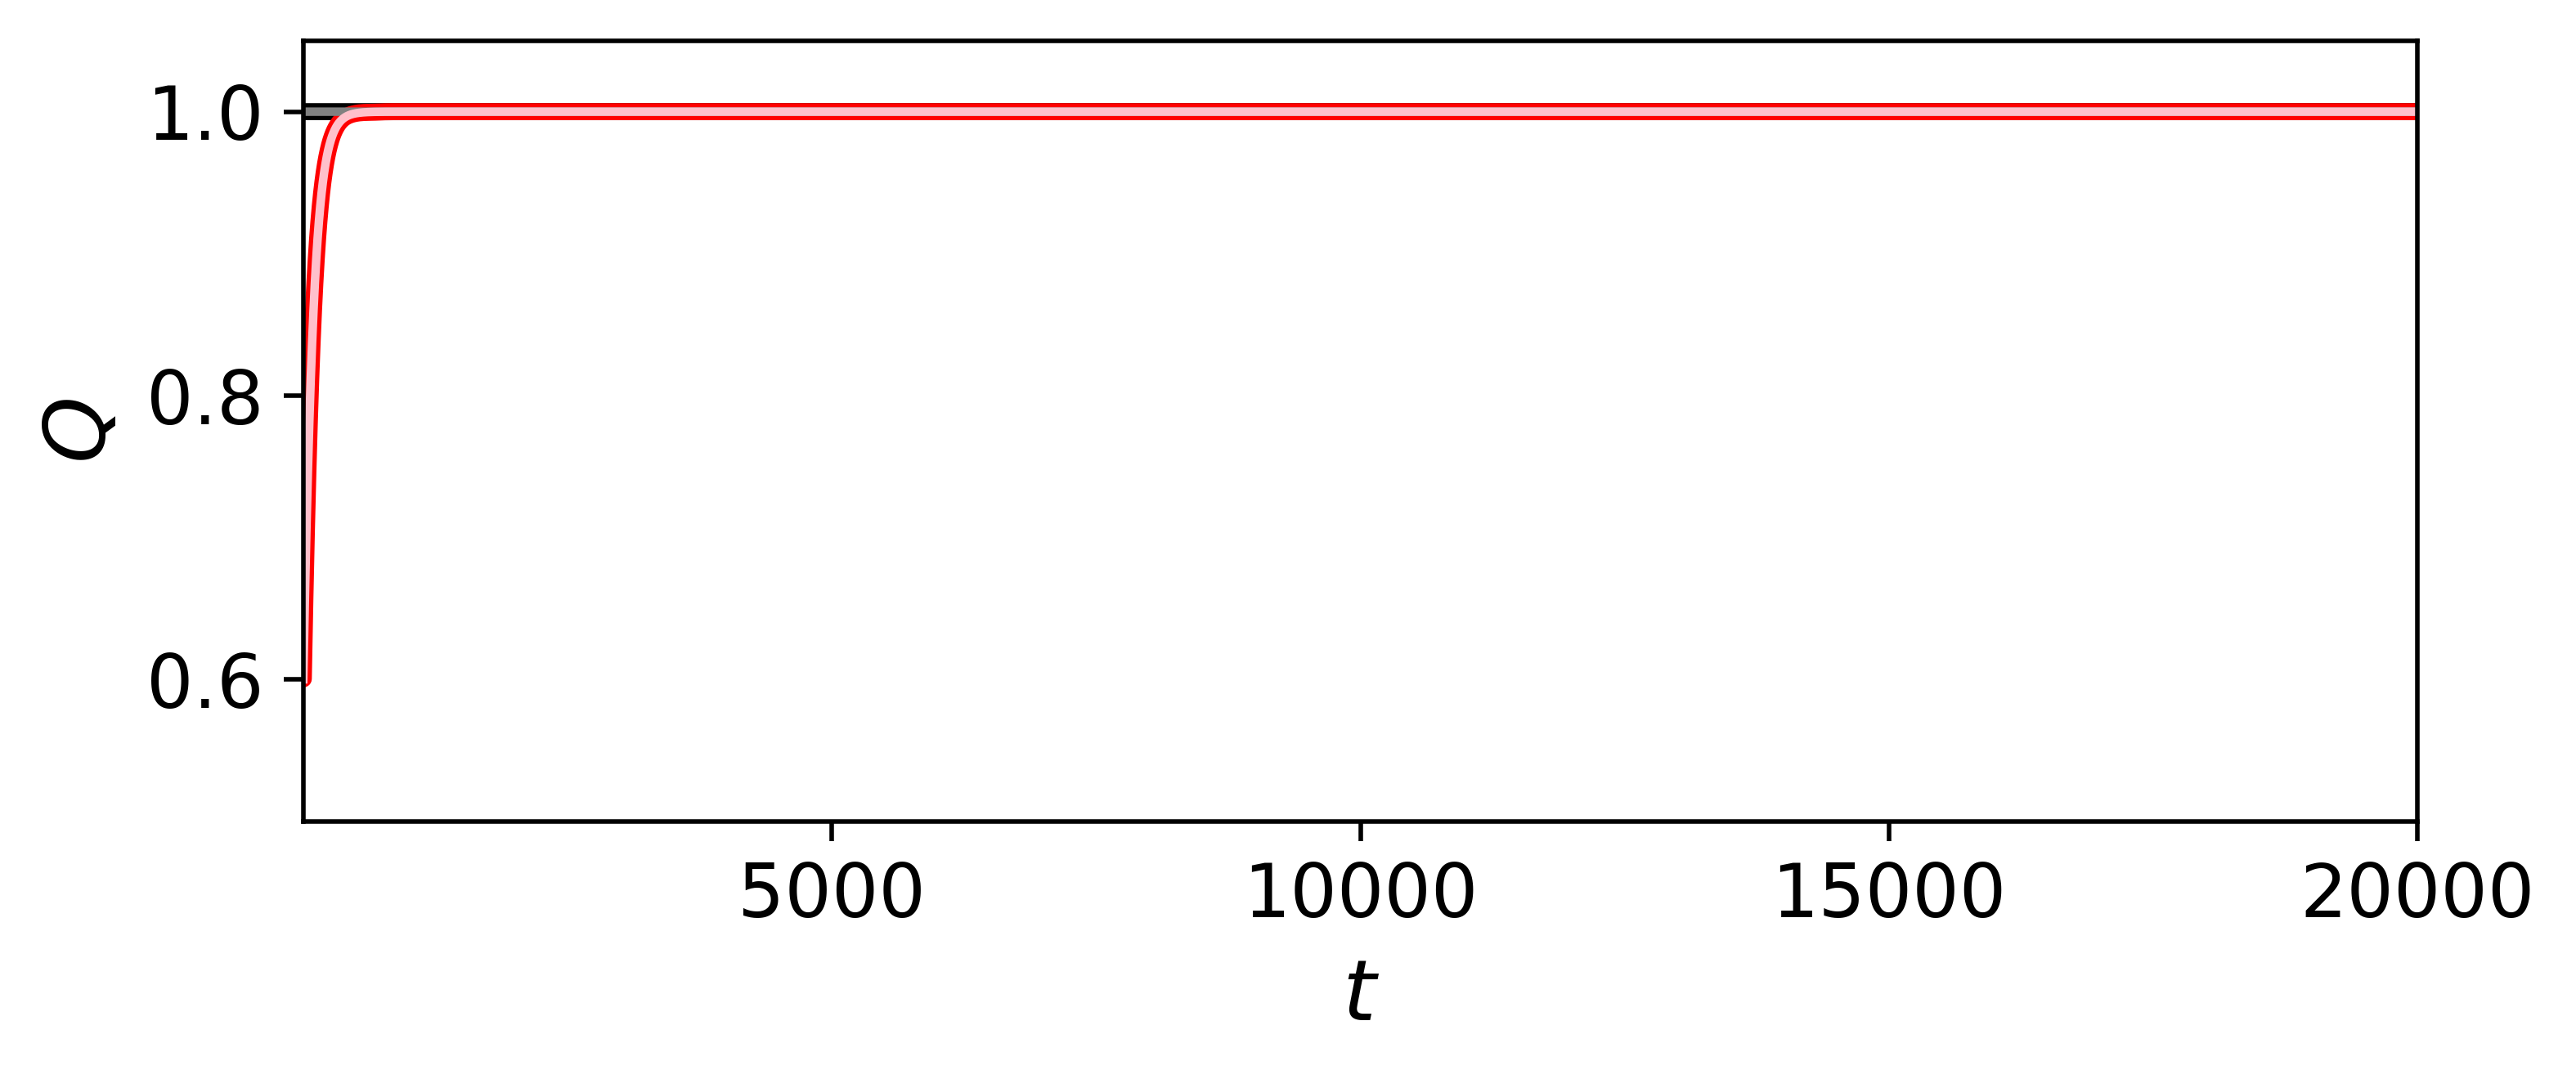

In [33]:
plt.figure(dpi=500)

plt.subplot(211)



plt.plot(t,Q1_s,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,Q1_2,color='grey')


plt.plot(t,Q2_s,label='Simulation',color='red',lw=3,zorder=0)
plt.plot(t,Q2_2,color='pink')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
# plt.legend()
plt.ylabel('$Q$',fontsize=15)
plt.xlabel('$t$',fontsize=15)
plt.xticks([5000,10000,15000,20000],fontsize=13)
plt.yticks([0.6,0.8,1.0],fontsize=13)

# for a in nums:
    # plt.plot(t_,Q2_S[a])
# plt.suptitle(rf'$\alpha=\pi/8,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
plt.xlim(0,20000)
plt.ylim(0.5,1.05)
plt.tight_layout()

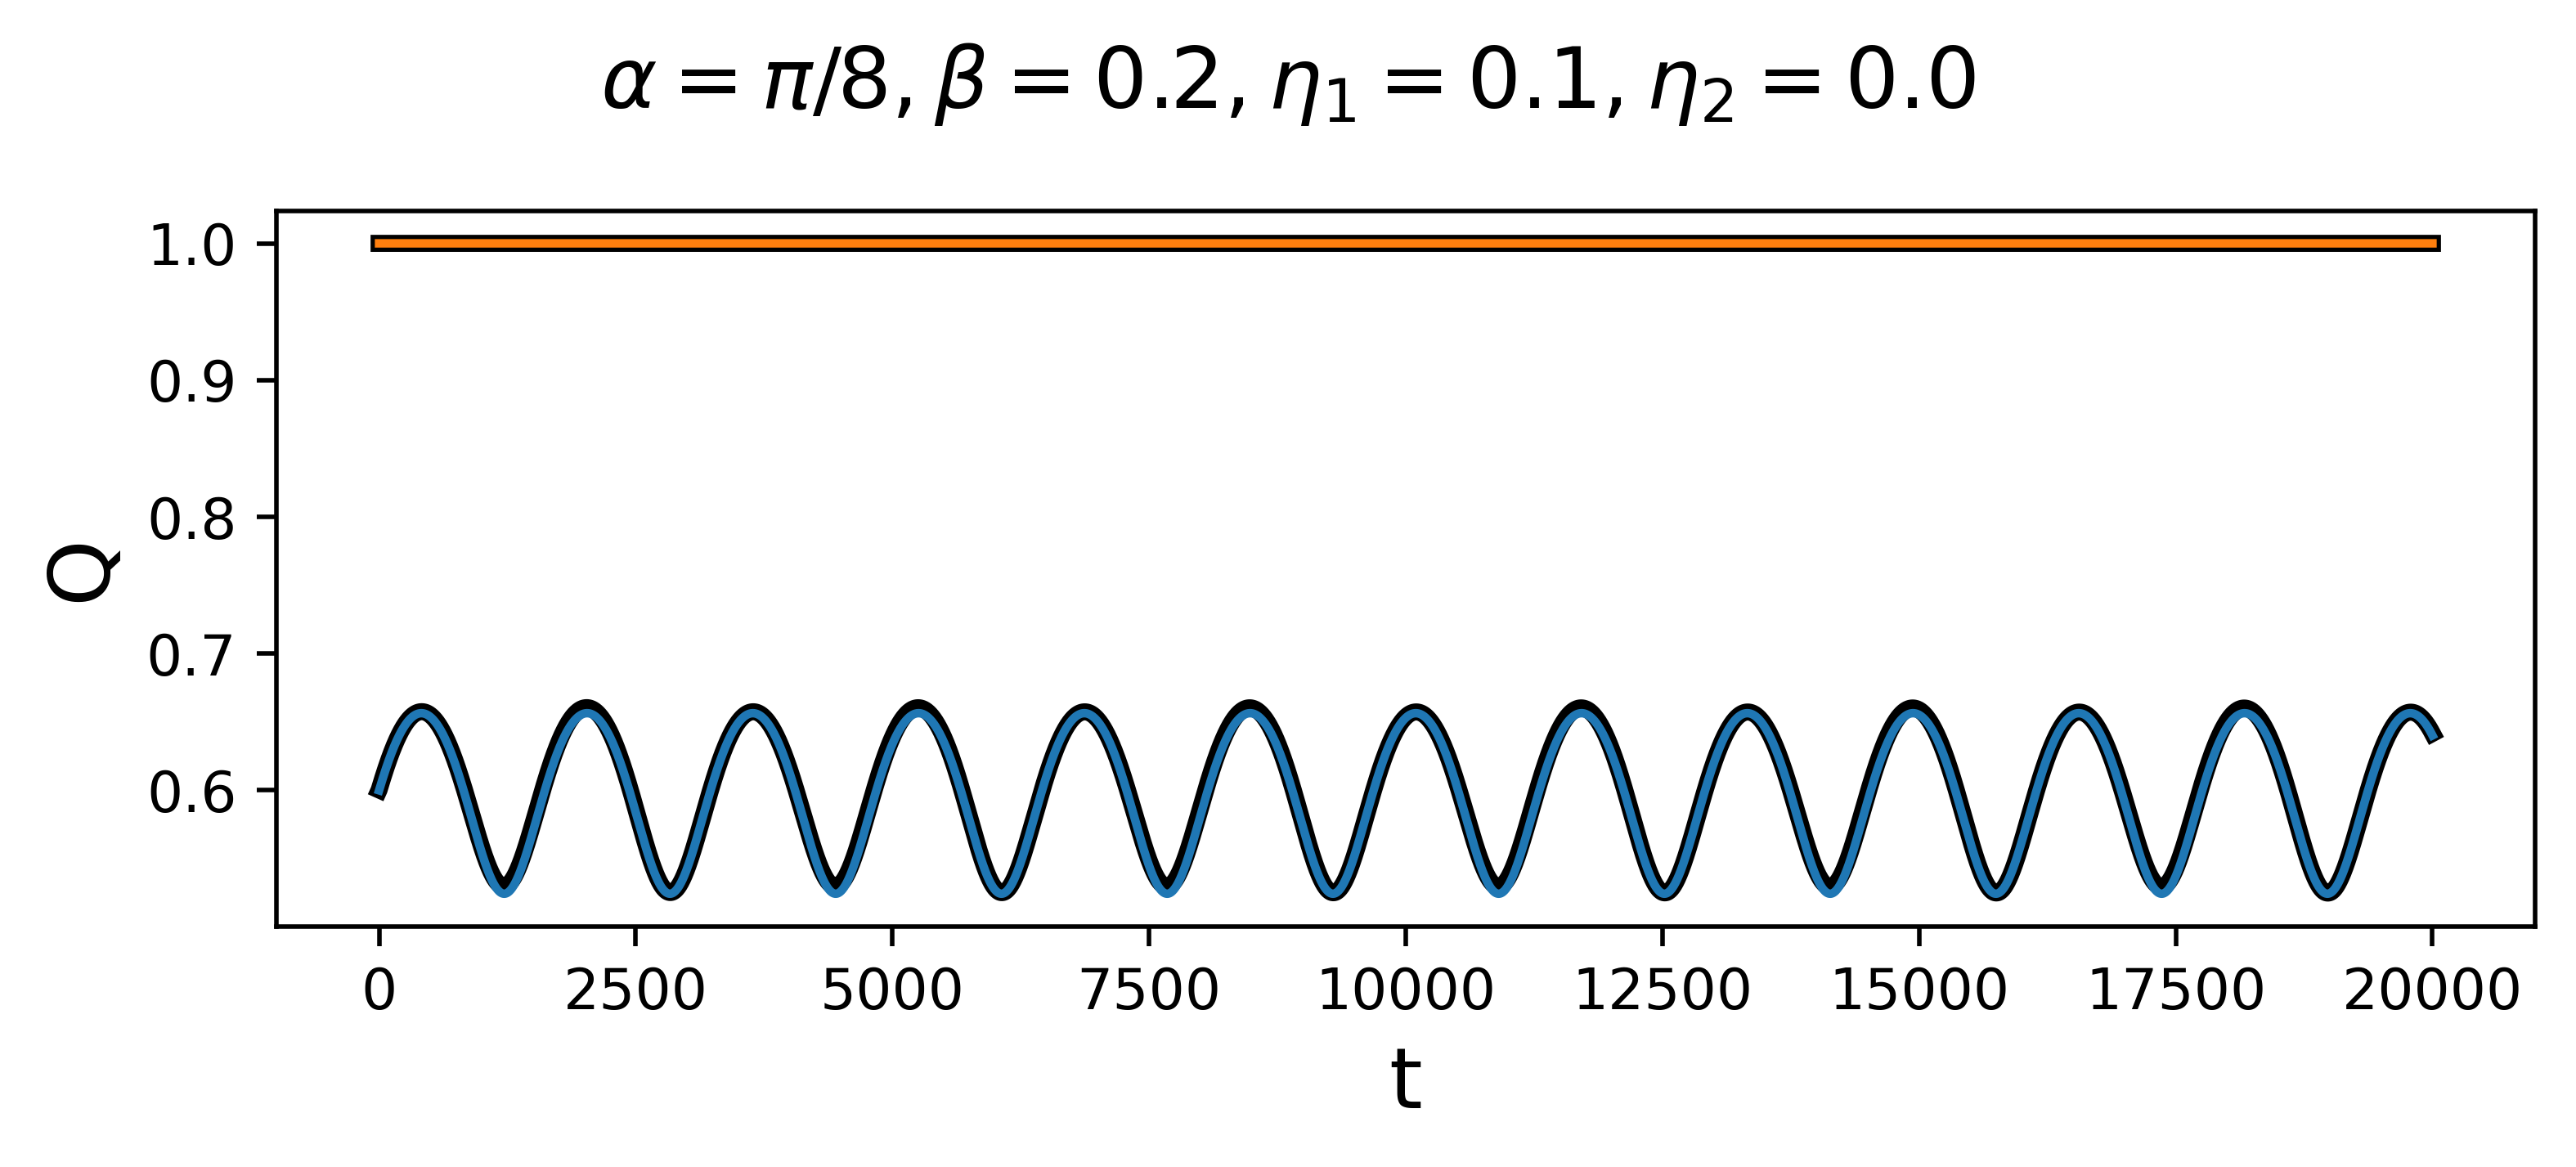

In [19]:
plt.figure(dpi=500)

plt.subplot(211)
plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,Q2_2,label='OA ansatz $n>1$')


plt.plot(t,Q1_s,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,Q1_2,label='OA ansatz $n>1$')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
# plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/8,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
# plt.xlim(0,3000)
# plt.ylim(0.0,1.05)
plt.tight_layout()

In [ ]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,dpi=500)

plt.sca(ax1)
plt.plot(t,Q22_s,label='Simulation',color='#00BAFF',lw=3,zorder=0)
plt.plot(t,Q22_2,color='black',label='OA ansatz')
plt.xlim(0,2000)
plt.ylim(0.6,1.0)
plt.ylabel(r'$Q_2$',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.sca(ax2)
plt.plot(t,Q2_s,label='Simulation',color='#00FF73',lw=3,zorder=0)
plt.plot(t,Q2_2,color='black',label='OA ansatz')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
# plt.legend()
plt.ylabel(r'$Q_2$',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
# plt.suptitle(rf'$\alpha=\pi/4,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0,2000)
plt.ylim(0.3,0.7)
plt.tight_layout()

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def get_mu(r,alpha,eta1,eta2):
    S =  r**2  + r**-2
    delta = S - 2
    k =  eta2/eta1
    mu = (k*delta  + np.sqrt(S*(2*r**2 + k**2 * delta)))/(2*r)
    return mu


def get_mu(r,alpha,eta1,eta2):
    S =  r**2  + r**-2
    delta = S - 2
    k =  eta2/eta1
    mu = (-k*delta  + np.sqrt(S*(2*r**2 + k**2 * delta)))/(2*r)
    return mu

In [62]:
R =  np.linspace(0.1,1,10000)
eta1 = 0.001
eta2 = 0.1
mu = get_mu(R,alpha,eta1,eta2)

In [63]:
np.min(mu)

1.0

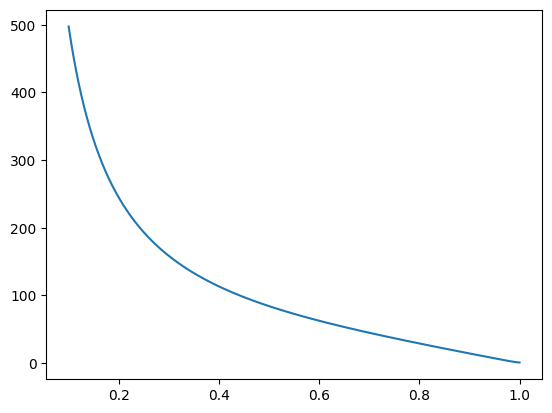

In [64]:
plt.plot(R,mu)
# plt.ylim(0,1)
# plt.ylim(0,1)

# 250701

In [31]:
eta1 = 0.01
eta2 = 0.1

alpha = 0.2
mu = 0.8



In [32]:
phi = np.linspace(-np.pi,np.pi,1000)

dphi =  -(eta1 ** 2 * np.sin(alpha) + 2*mu*eta1*eta2*np.sin(alpha+phi) + mu**2 * eta2**2 * np.sin(alpha + 2*phi)) + \
         (eta2 ** 2 * np.sin(alpha) + 2*mu*eta1*eta2*np.sin(alpha-phi) + mu**2 * eta1**2 * np.sin(alpha - 2*phi))

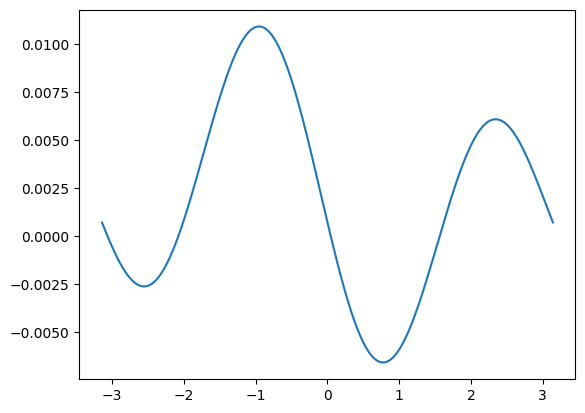

In [33]:
plt.plot(phi,dphi)